In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import h5py
from tqdm import tqdm # progress bar for loops, interrupt if needed
from scipy.optimize import curve_fit

#Formatting for plots
plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('bmh')
# DiscModel is in a different file
from src.DiscModel import DiscGalaxy
N = 1000000 # number of stars in the disc
a = 1 # a is the scale length of the disc in kpc
D = DiscGalaxy(N=N,a=a)

rmax = 20.
nbins = 64
mmax = 10
nmax = 10
noise=0.5
"""Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes."""

'Recall m corresponds to Fourier (azimuthal) modes, n corresponds to Laguerre (radial harmonics) modes.'

Position Angles: 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]


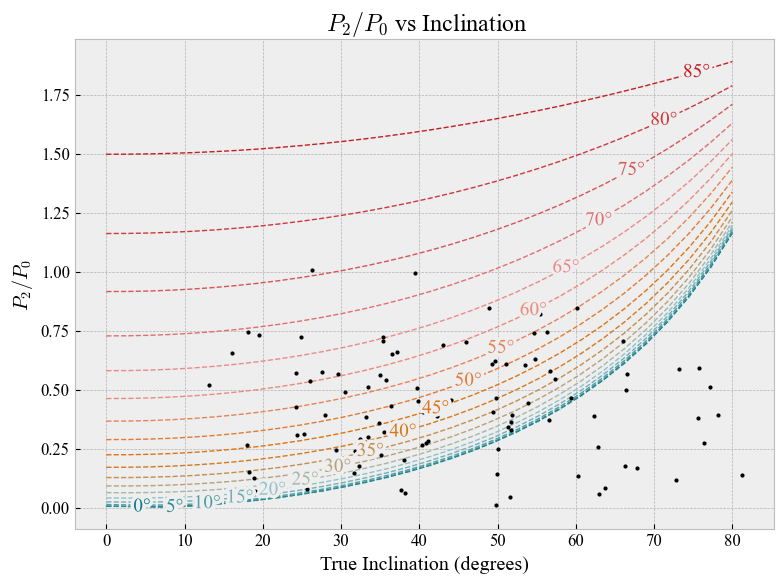

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from labellines import *
from matplotlib.colors import LinearSegmentedColormap

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0D7D87-99C6CC-DC7004-EE9093-C31E23
    (0.000, (0.051, 0.490, 0.529)),
    (0.250, (0.600, 0.776, 0.800)),
    (0.500, (0.863, 0.439, 0.016)),
    (0.750, (0.933, 0.565, 0.576)),
    (1.000, (0.765, 0.118, 0.137))))
    
# Parameters
inclinations = np.linspace(0, 80, 30)
position_angles = np.arange(0, 90, 5)
colorindx = np.linspace(0, 1, len(position_angles))
mmax, nmax = 3, 1
a = 1.
N = 100000
rmax = 5
nbins = 128
noise = 0.5
Am_fit=0.637
Bm_fit=3.736
Cm_fit=0.032
# Store result
pa_results = {PA: [] for PA in position_angles}

for PA in tqdm(position_angles, desc="Position Angles"):
    for inc in inclinations:
        D = DiscGalaxy(N=N, a=a)
        D.rotate_disc(inc, PA, 0)
        D.generate_image(rmax=rmax, nbins=nbins, noiselevel=noise)

        E = D.make_pointexpansion(mmax, nmax, a*1.5)

        # Compute fractional powers
        coef_mag = np.sqrt(E.coscoefs**2 + E.sincoefs**2)
        m_power = np.sum(coef_mag, axis=1)
        n_power = np.sum(coef_mag, axis=0)
        fracn_power = n_power / np.sum(n_power)
        fracm_power = m_power / np.sum(m_power)
        # Store P2/P0
        try:
            mratio = fracm_power[2] / fracm_power[0]
        except ZeroDivisionError:
            mratio = np.nan
        pa_results[PA].append(mratio)


plt.figure(figsize=(8, 6))

counter = 0
for PA, ratios in pa_results.items():
    plt.plot(inclinations, ratios, marker='.', markersize=0.1, linewidth=1,linestyle='dashed', label=f'{PA:.0f}°', color=my_gradient(colorindx[counter]))
    counter += 1
    

plt.xlabel("Inclination angle (deg)")
plt.ylabel(r"$P_2/ P_0$")
plt.title(r"$P_2/ P_0$ vs Inclination for Different Position Angles")
labelLines(plt.gca().get_lines(),align=False,fontsize=14)
plt.grid(True)
plt.tight_layout()


import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.colors import LinearSegmentedColormap


npy_files=glob.glob('data/*')

inclinations = []
ratios = []

for file in npy_files:
   
    data = np.load(file, allow_pickle=True)[()]
    coscoefs = data['coscoefs']
    sincoefs = data['sincoefs']

    P0 = np.sqrt(coscoefs[0,0,0]**2 + sincoefs[0,0,0]**2)
    P2 = np.sqrt(coscoefs[0,0,2]**2 + sincoefs[0,0,2]**2)
    ratio = P2 / P0

    # Inclination in degrees
    inclination_deg = data['inclination'][0] * 180 / np.pi
   
    
    # Store
    inclinations.append(inclination_deg)
    ratios.append(ratio)


#plot
inclinations = np.array(inclinations)
ratios = np.array(ratios)



plt.plot(inclinations, ratios, '.', color='black', markersize=4, label='Points')
# plt.plot(incl, ratios, 'o', label='Data', color=colours)
#plt.plot(theta_vals, fit_vals, '-', label=f'Fit: A*sin(θ)^B + C\nA={A_fit:.3f}, B={B_fit:.3f}, C={C_fit:.3f}', color='darkorange')


#plt.plot(theta_deg, Rmplot, 'o', label=r'$P_2/P_0$ Fourier Simulation', color='#c31e23')
# plt.plot(test_incl,test_ratios, 'o', label='Estimated Inclinations', color=colours)
""" for i in range(len(test_incl)):
    plt.plot(test_incl[i], ratios[i], '*', color=colours[i], markersize=8) """
plt.xlabel("True Inclination (degrees)")
plt.ylabel(r"$P_2/P_0$")
plt.title(r" $P_2/P_0$ vs Inclination")

plt.grid(True)
plt.tight_layout()
plt.show()



